In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates


In [4]:
df = pd.read_csv('2016-donations.csv', index_col = False)

/Users/jessicacherny/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.00,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.00,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.00,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.00,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.00,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016
5,C00458844,P60006723,"Rubio, Marco","MARQUEZ, PANFILO",DPO,AE,097770241,DEPARTMENT OF STATE,FOREIGN SERVICE OFFICER,100.00,07-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074238,P2016
6,C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.00,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
7,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.00,06-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1125521,P2016
8,C00458844,P60006723,"Rubio, Marco","RECKER, ANGELA",APO,AE,00138,GOVERNMENT,ATTORNEY,388.25,18-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153167,P2016
9,C00458844,P60006723,"Rubio, Marco","HEFFERNAN, MICHAEL",APO,AE,09096,RETIRED,RETIRED,225.00,29-OCT-15,NaN,NaN,NaN,SA17A,1047126,SA17.863181,P2016


In [6]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016


In [7]:
df.shape


(7440252, 18)

In [8]:
df.describe() #summary statistics!

,contb_receipt_amt,file_num
count,7.440252e+06,7.440252e+06
mean,1.261310e+02,1.101464e+06
std,7.623128e+03,2.975025e+04
min,-9.330800e+04,1.003942e+06
25%,1.500000e+01,1.077916e+06
50%,2.800000e+01,1.098663e+06
75%,9.435000e+01,1.133832e+06
max,1.277771e+07,1.146285e+06


In [9]:
df.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')

In [14]:
df['contbr_st']

0          20
1          30
2          AE
3          AE
4          AE
5          AE
6          AE
7          AE
8          AE
9          AE
10         AE
11         AE
12         AE
13         AE
14         AE
15         AE
16         AE
17         AE
18         AE
19         AE
20         AK
21         AK
22         AK
23         AK
24         AK
25         AK
26         AK
27         AK
28         AK
29         AK
           ..
7440222    WI
7440223    WI
7440224    WI
7440225    WI
7440226    WI
7440227    WI
7440228    WI
7440229    WI
7440230    WI
7440231    WI
7440232    WI
7440233    WI
7440234    WI
7440235    WI
7440236    WI
7440237    WI
7440238    WV
7440239    WV
7440240    WV
7440241    WV
7440242    WV
7440243    WY
7440244    WY
7440245    WY
7440246    WY
7440247    WY
7440248    WY
7440249    WY
7440250    WY
7440251    WY
Name: contbr_st, Length: 7440252, dtype: object

In [15]:
# you have to use double brackets because it's a list!
contributions = df[['cand_nm', 'contb_receipt_dt', 'contb_receipt_amt', 'contbr_nm', 'election_tp']]
contributions

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
0,"Rubio, Marco",15-MAR-16,175.00,"BLUM, MAUREEN",P2016
1,"Rubio, Marco",16-MAR-16,25.00,"DODSON, MARK B. MR.",P2016
2,"Rubio, Marco",20-FEB-16,100.00,"CHILDERS, WILLIAM",P2016
3,"Rubio, Marco",10-MAR-16,200.00,"RUCINSKI, ROBERT",P2016
4,"Rubio, Marco",08-MAR-16,100.00,"RUCINSKI, ROBERT",P2016
5,"Rubio, Marco",07-MAR-16,100.00,"MARQUEZ, PANFILO",P2016
6,"Rubio, Marco",26-JUN-15,500.00,"DOHERTY, THERESA",P2016
7,"Rubio, Marco",06-FEB-16,100.00,"CHILDERS, WILLIAM",P2016
8,"Rubio, Marco",18-MAR-16,388.25,"RECKER, ANGELA",P2016
9,"Rubio, Marco",29-OCT-15,225.00,"HEFFERNAN, MICHAEL",P2016


In [16]:
clean_contributions = contributions.dropna()

In [18]:
clean_contributions.shape


(7426230, 5)

In [19]:
contributions.shape[0] - clean_contributions.shape[0] #that's how many rows were dropped!

14022

In [21]:
sum(pd.isnull(contributions['election_tp']))

14022

In [22]:
clean_contributions.head()

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
0,"Rubio, Marco",15-MAR-16,175.0,"BLUM, MAUREEN",P2016
1,"Rubio, Marco",16-MAR-16,25.0,"DODSON, MARK B. MR.",P2016
2,"Rubio, Marco",20-FEB-16,100.0,"CHILDERS, WILLIAM",P2016
3,"Rubio, Marco",10-MAR-16,200.0,"RUCINSKI, ROBERT",P2016
4,"Rubio, Marco",08-MAR-16,100.0,"RUCINSKI, ROBERT",P2016


In [23]:
clean_contributions.cand_nm.unique() #all the peeps that received money

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary',
       'McMullin, Evan'], dtype=object)

In [24]:
trump_conts = clean_contributions[clean_contributions.cand_nm == 'Trump, Donald J.']

In [25]:
trump_conts.head()

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
6588686,"Trump, Donald J.",08-MAY-16,100.00,"ECKERSALL, LAWRENCE",P2016
6588687,"Trump, Donald J.",10-MAR-16,48.75,"VANBEUGE, ROBERT",P2016
6588688,"Trump, Donald J.",03-MAR-16,300.00,"VANBEUGE, ROBERT",P2016
6588689,"Trump, Donald J.",11-JUL-16,28.00,"VANBEUGE, ROBERT",P2016
6588690,"Trump, Donald J.",25-NOV-16,100.25,"BLAKESLEE, TODD",G2016


In [27]:
trump_conts.describe()
#trump's cont is $155!

,contb_receipt_amt
count,771259.000000
mean,155.834139
std,372.764083
min,-17705.000000
25%,28.000000
50%,60.000000
75%,160.000000
max,86936.800000


In [28]:
bernie_conts = clean_contributions[clean_contributions.cand_nm == 'Sanders, Bernard']
bernie_conts.head()


,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
4450099,"Sanders, Bernard",02-JUN-16,27.00,"MULLIGAN, PATRICK",P2016
4450100,"Sanders, Bernard",28-JUN-16,10.00,"MULLIGAN, PATRICK",P2016
4450101,"Sanders, Bernard",28-JUL-16,10.00,"MULLIGAN, PATRICK",P2016
4450102,"Sanders, Bernard",29-JUN-16,15.00,"BRUUS, KIRSTEN",P2016
4450103,"Sanders, Bernard",07-JUN-16,14.29,"COLLINS, ERNEST",P2016


In [29]:
bernie_conts.describe() #bernie's contribution is way less than trump's, #$45

,contb_receipt_amt
count,2.063094e+06
mean,4.470614e+01
std,1.420453e+02
min,-9.330800e+04
25%,1.350000e+01
50%,2.700000e+01
75%,5.000000e+01
max,1.000000e+04


In [30]:
hillary_conts = clean_contributions[clean_contributions.cand_nm == 'Clinton, Hillary Rodham']
hillary_conts.head()
hillary_conts.describe()
#clinton was $130

,contb_receipt_amt
count,3.506056e+06
mean,1.301792e+02
std,4.777289e+03
min,-2.000000e+04
25%,1.500000e+01
50%,2.500000e+01
75%,1.000000e+02
max,4.904861e+06


In [31]:
hillary_conts_short = hillary_conts[abs(hillary_conts.contb_receipt_amt) > 100]

In [32]:
hillary_conts_short

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
944018,"Clinton, Hillary Rodham",24-FEB-16,152.24,"DYSON, LISA",P2016
944021,"Clinton, Hillary Rodham",29-JUL-16,250.00,"ROBINSON, TODD",G2016
944023,"Clinton, Hillary Rodham",23-FEB-16,2600.00,"BROWN, CLIFFORD",P2016
944038,"Clinton, Hillary Rodham",10-JUL-16,250.00,"VARGHESE, SHRI SHIJO",P2016
944048,"Clinton, Hillary Rodham",13-AUG-16,250.00,"STRAUSS, NANCY",G2016
944055,"Clinton, Hillary Rodham",28-JUL-16,250.00,"STRAKER, ROB",G2016
944058,"Clinton, Hillary Rodham",09-JUN-16,250.00,"ZGOLINSKI, ANDREW",P2016
944062,"Clinton, Hillary Rodham",02-MAY-16,1700.00,"PHILLIPS, DIANA SHANEDLING",P2016
944067,"Clinton, Hillary Rodham",21-JUN-16,300.00,"FRIES-LAFFAILLE, SUSAN",P2016
944074,"Clinton, Hillary Rodham",27-AUG-16,300.00,"HARESCH, JOHN",G2016


In [33]:
trump_conts_short = trump_conts[abs(trump_conts.contb_receipt_amt) > 100]
trump_conts_short

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
6588688,"Trump, Donald J.",03-MAR-16,300.00,"VANBEUGE, ROBERT",P2016
6588690,"Trump, Donald J.",25-NOV-16,100.25,"BLAKESLEE, TODD",G2016
6588692,"Trump, Donald J.",12-NOV-16,164.61,"MESENBRINK, CYNTHIA M.",G2016
6588693,"Trump, Donald J.",25-NOV-16,124.91,"ANDERSON, TROY",G2016
6588697,"Trump, Donald J.",15-NOV-16,100.37,"KOEVOET, CHERYL",G2016
6588699,"Trump, Donald J.",24-NOV-16,244.11,"BLANKENSHIP, GREGORY",G2016
6588700,"Trump, Donald J.",19-JUL-16,200.00,"BYERS, WILLIAM",P2016
6588701,"Trump, Donald J.",28-SEP-16,2700.00,"LINDELL, TIMOTHY",G2016
6588703,"Trump, Donald J.",19-OCT-16,-414.75,"LINDELL, TIMOTHY",G2016
6588704,"Trump, Donald J.",24-OCT-16,300.00,"FECHER, PEGGY",G2016


In [34]:
def to_donation_xy_points(contributions):
    donations_dict = defaultdict(lambda:0)
    for index, row in contributions.iterrows(): #returns an iterable
        date = dt.datetime.strptime(row.contb_receipt_dt, '%d-%b-%y')
        donations_dict[date] += row.contb_receipt_amt
    sorted_by_date = sorted(donations_dict.items()) #sorted by keys
    return zip(*sorted_by_date)
#returns tuples of x and y values

#key is date, value is the amount donated on that day

In [37]:
hill_x, hill_y = to_donation_xy_points(hillary_conts_short)

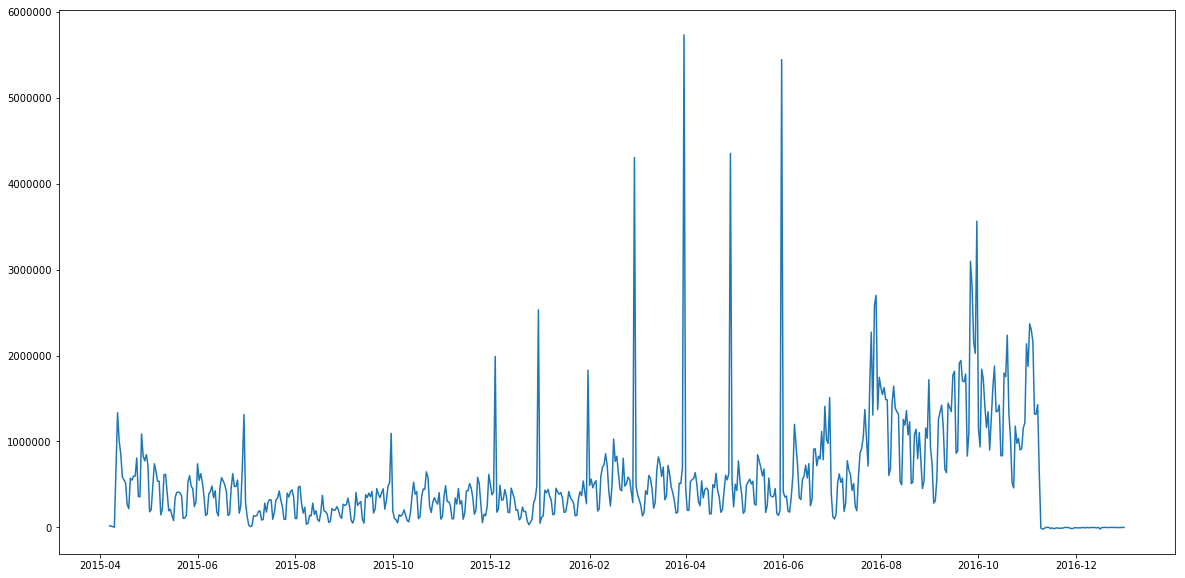

In [38]:
plt.figure(figsize = (20, 10))
plt.plot(hill_x, hill_y)
plt.show()

In [39]:
#what's with the spikes? We want to see what these largest values are and who donated them
hillary_conts_short.sort_values('contb_receipt_amt', ascending = False)

,cand_nm,contb_receipt_dt,contb_receipt_amt,contbr_nm,election_tp
3284270,"Clinton, Hillary Rodham",31-MAR-16,4904860.51,HILLARY VICTORY FUND - UNITEMIZED,P2016
3379521,"Clinton, Hillary Rodham",31-MAY-16,4575438.56,HILLARY VICTORY FUND - UNITEMIZED,P2016
3364742,"Clinton, Hillary Rodham",29-FEB-16,3686373.26,HILLARY VICTORY FUND - UNITEMIZED,P2016
3369437,"Clinton, Hillary Rodham",29-APR-16,3600489.08,HILLARY VICTORY FUND - UNITEMIZED,P2016
3329073,"Clinton, Hillary Rodham",31-DEC-15,1797624.94,HILLARY VICTORY FUND - UNITEMIZED,P2016
3332188,"Clinton, Hillary Rodham",04-DEC-15,1603724.41,HILLARY VICTORY FUND - UNITEMIZED,P2016
3335001,"Clinton, Hillary Rodham",31-JAN-16,1467070.94,HILLARY VICTORY FUND - UNITEMIZED,P2016
2100183,"Clinton, Hillary Rodham",29-JUN-15,20000.00,"GOCKE, THOMAS",P2016
1216459,"Clinton, Hillary Rodham",22-JUN-16,10000.00,"YOUNG, SAMUEL J.",P2016
1223853,"Clinton, Hillary Rodham",22-JUN-16,7300.00,"YOUNG, SAMUEL J.",P2016


In [42]:
hillary_conts_real = hillary_conts_short[hillary_conts_short.contbr_nm != 'HILLARY VICTORY FUND - UNITEMIZED']
hill_x2, hill_y2 = to_donation_xy_points(hillary_conts_real)

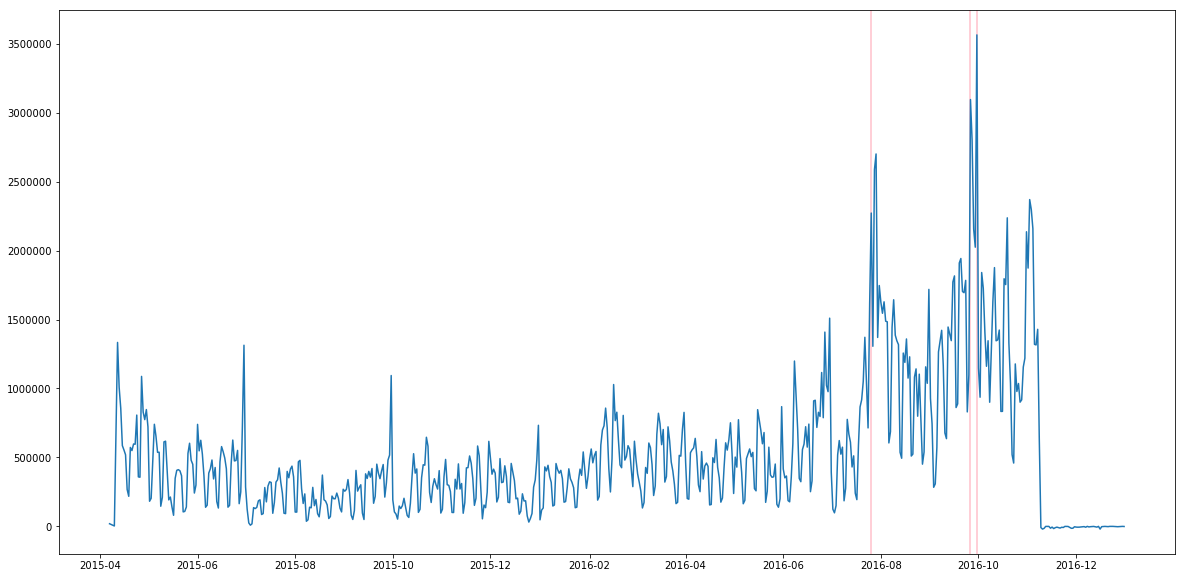

In [45]:
plt.figure(figsize = (20, 10))
plt.axvline(x=dt.datetime(2016, 7, 26), c = 'pink') #contribution spike marker! OBAMA endorses Hillary
plt.axvline(x=dt.datetime(2016, 9, 26), c = 'pink') #first presidential debate, hillary won
plt.axvline(x=dt.datetime(2016, 9, 30), c = 'pink') #presidential debate, hillary won
plt.plot(hill_x2, hill_y2)
plt.show()

In [47]:
trump_x, trump_y = to_donation_xy_points(trump_conts_short)

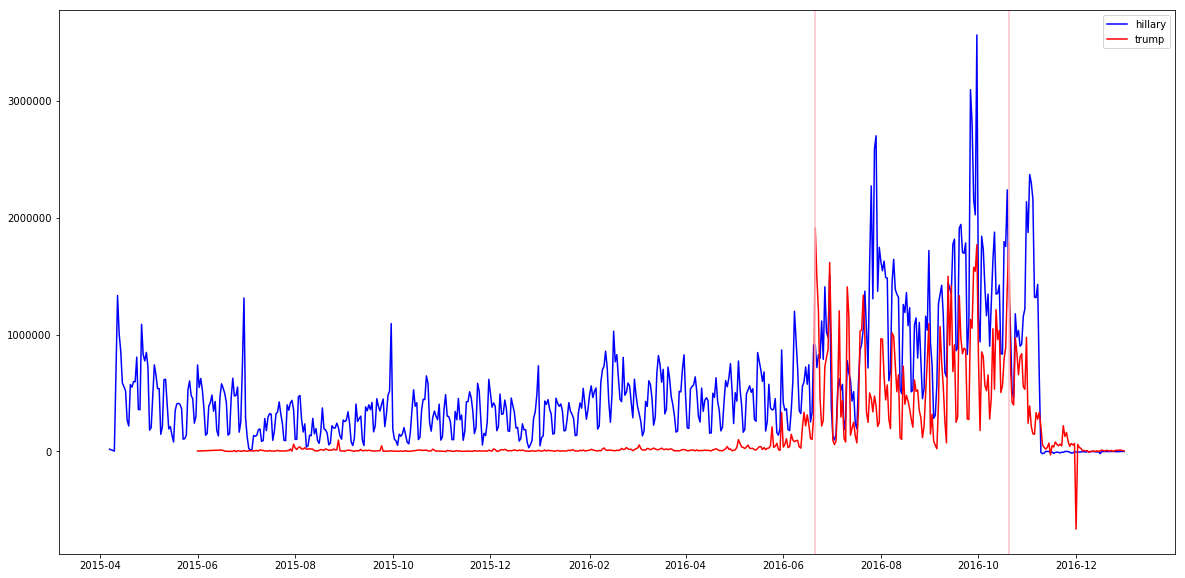

In [53]:
plt.figure(figsize = (20,10))
plt.plot(hill_x2, hill_y2, label = 'hillary', c = 'blue')
plt.plot(trump_x, trump_y, label = 'trump', c = 'red')
plt.axvline(x = dt.datetime(2016, 6, 21), c = 'pink')
plt.axvline(x = dt.datetime(2016, 10, 20), c = 'pink')
plt.legend()
plt.show()

In [57]:
tweets = pd.read_csv('trump-tweets.csv')
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for Android,So I raised/gave $5600000 for the veterans and...,06-01-2016 13:17:58,9381,29810,False
1,Twitter for iPhone,Join me in San Jose California- tomorrow eveni...,06-01-2016 20:46:38,3245,9350,False
2,Twitter for Android,Crooked Hillary Clinton is a fraud who has put...,06-01-2016 22:16:36,9816,27248,False
3,Twitter for iPhone,"Same failing @nytimes ""reporter"" who wrote dis...",06-02-2016 00:21:01,4026,13160,False
4,Twitter for iPhone,Thank you Sacramento California! #MakeAmericaG...,06-02-2016 04:58:34,5147,16491,False


In [60]:
android = tweets[tweets.source.str.contains('Android')]
android.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for Android,So I raised/gave $5600000 for the veterans and...,06-01-2016 13:17:58,9381,29810,False
2,Twitter for Android,Crooked Hillary Clinton is a fraud who has put...,06-01-2016 22:16:36,9816,27248,False
5,Twitter for Android,@SCPioneer: @stockdaleism @JamesRosenFNC @FoxN...,06-02-2016 05:11:16,1935,6899,False
6,Twitter for Android,@HaloDad22: @realDonaldTrump I already voted f...,06-02-2016 22:18:50,2776,9057,False
7,Twitter for Android,@TaylorEdwards99: THIS IS @POTUS'S LEGACY! AN ...,06-02-2016 22:22:20,2493,8602,False


In [61]:
iphone = tweets[tweets.source.str.contains('iPhone')]
iphone.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
1,Twitter for iPhone,Join me in San Jose California- tomorrow eveni...,06-01-2016 20:46:38,3245,9350,False
3,Twitter for iPhone,"Same failing @nytimes ""reporter"" who wrote dis...",06-02-2016 00:21:01,4026,13160,False
4,Twitter for iPhone,Thank you Sacramento California! #MakeAmericaG...,06-02-2016 04:58:34,5147,16491,False
9,Twitter for iPhone,RT @IvankaTrump: Beautiful article about @real...,06-03-2016 01:12:12,2762,0,True
10,Twitter for iPhone,.@Natalie_Gulbis- Thank you for the nice piece...,06-03-2016 01:13:19,1836,6459,False


In [62]:
sum(android.text.str.contains('Hillary'))

161

In [63]:
sum(iphone.text.str.contains('Hillary'))

145

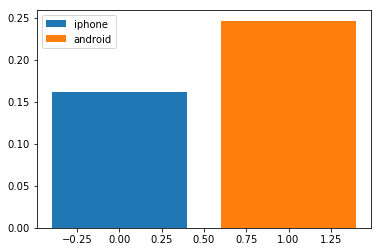

In [69]:
search_string = '(?i)hillary'  #this ignores case!
iphone_c = sum(iphone.text.str.contains(search_string))/len(iphone)
android_c = sum(android.text.str.contains(search_string))/len(android)

plt.bar(0, iphone_c, label = 'iphone')
plt.bar(1, android_c, label = 'android')
plt.legend()
plt.show()

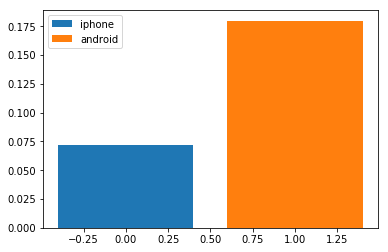

In [71]:
#this signifies he is an attacker!

search_string = '(?i)crooked'  #this ignores case!
iphone_c = sum(iphone.text.str.contains(search_string))/len(iphone)
android_c = sum(android.text.str.contains(search_string))/len(android)

plt.bar(0, iphone_c, label = 'iphone')
plt.bar(1, android_c, label = 'android')
plt.legend()
plt.show()

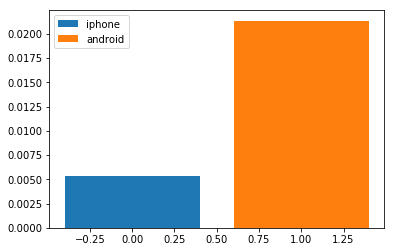

In [72]:
search_string = '(?i)sad'  #this ignores case!
iphone_c = sum(iphone.text.str.contains(search_string))/len(iphone)
android_c = sum(android.text.str.contains(search_string))/len(android)

plt.bar(0, iphone_c, label = 'iphone')
plt.bar(1, android_c, label = 'android')
plt.legend()
plt.show()

In [73]:
tweets.created_at = tweets.created_at.astype(str).apply(lambda x: x[:10])  
#this deletes the time frm the date! takes first 10 characters frm date created_at
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter for Android,So I raised/gave $5600000 for the veterans and...,06-01-2016,9381,29810,False
1,Twitter for iPhone,Join me in San Jose California- tomorrow eveni...,06-01-2016,3245,9350,False
2,Twitter for Android,Crooked Hillary Clinton is a fraud who has put...,06-01-2016,9816,27248,False
3,Twitter for iPhone,"Same failing @nytimes ""reporter"" who wrote dis...",06-02-2016,4026,13160,False
4,Twitter for iPhone,Thank you Sacramento California! #MakeAmericaG...,06-02-2016,5147,16491,False


In [74]:
def for_trump_tweets(dataframe, field):
    tweets_dict = defaultdict(lambda:0)
    for index, row in dataframe.iterrows():
        date = dt.datetime.strptime(row.created_at, '%m-%d-%Y')
        tweets_dict[date] += row[field]
    sorted_by_date = sorted(tweets_dict.items()) #zips together a key and value
    return zip(*sorted_by_date) #unzip at the end, so you have seperate x and y values

In [79]:
tweet_x, tweet_y = for_trump_tweets(tweets, 'favorite_count')
tweet_x2, tweet_y2 = for_trump_tweets(tweets, 'retweet_count')

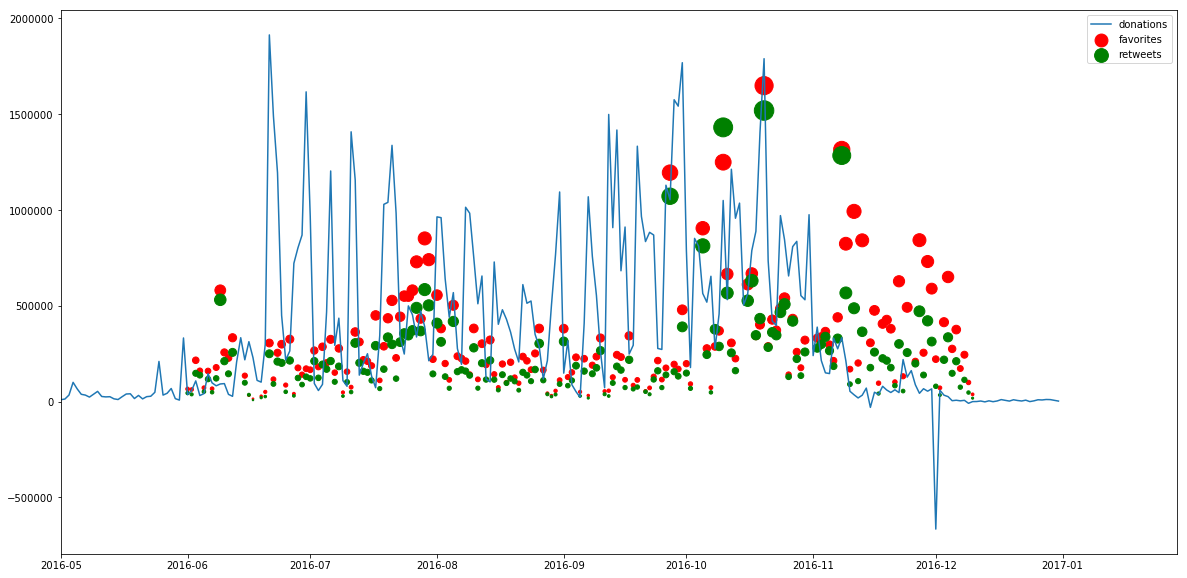

In [87]:
plt.figure(figsize = (20, 10))
plt.scatter(tweet_x, tweet_y, label = 'favorites', s = (np.array(tweet_y)/5000), c = 'red')
plt.scatter(tweet_x2, np.array(tweet_y2) * 2, label = 'retweets', s = (np.array(tweet_y2)/2000), c = 'green')
plt.plot(trump_x, trump_y, label = 'donations')
plt.xlim(left = dt.datetime(2016, 5, 1))
plt.legend()
plt.show()

In [ ]:
#office hours 7-8PM after class


In [88]:
state_conts = defaultdict(lambda:0)
for index, row in df.iterrows():
    state_conts[row.contbr_st] += row.contb_receipt_amt

In [89]:
state_data = pd.DataFrame.from_dict(state_conts, orient='index').reset_index().rename(columns={'index':'state',0:'amount'})

In [90]:
map = folium.Map(location=[40, -100], zoom_start=4)
map.choropleth(geo_path='us-states.json', 
             data=state_data,
             columns=['state', 'amount'],
             key_on='feature.id',
             fill_color='YlGnBu')
map

NameError: name 'folium' is not defined